# Housing Price Prediction in Ames, Iowa


## Problem statement and justification for the proposed approach
**TO DO: I'll edit this to be aligned with problem statement and justification**

**Project Description:** This project’s goal is to predict the final dollar value price of residential homes in Ames, Iowa, based on a dataset containing 79 explanatory variables that describe various aspects of the properties. The objective is to apply creative feature engineering techniques and advanced regression methods such as random forest and gradient boosting to accurately estimate the sale prices. Metrics will be evaluated using Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

**Overview of the dataset:** The dataset, known as the Ames Housing dataset, provides a comprehensive and modernized alternative for data scientists and was compiled by Dean De Cock for use in data science education. The selected dataset contains information related to various characteristics of houses sold. The dataset includes a wide range of variables such as the type of dwelling, zoning classification, lot size, road access, Additionally, it includes information about the sale of the houses, such as sale type, sale condition, and the month and year of the sale. The dataset contains 79 variables and the size of the Train and Test dataset is 1,460 rows each. Our dataset is based on a current competition held on Kaggle.com (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description).

## Data understanding (EDA)
This section will provide a graphical and non-graphical representation of relationships between the response variable and predictor variables


### Load and review the dataset


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pandas.api.types import CategoricalDtype
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers
from sklearn.metrics import mean_squared_error #Evaluation metric

from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
#warnings.filterwarnings("ignore", category=LinAlgWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)



warnings.filterwarnings("ignore", category=UserWarning)
#warnings.filterwarnings("ignore")

# Apply the seaborn theme
sns.set_theme()

# mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view

#Train CSV
downloaded = drive.CreateFile({'id':'1d2FKPGgasxOLItCMFm7TXw7TtiUBykqq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')

#Test CSV
downloaded = drive.CreateFile({'id':'1_eNXlHAluHC3DlZKegEjZZTQ3PXby18Z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')




The training dataset has 1460 rows of data with an Id column, 79 feature columns, and a target column called SalesPrice.

In [ ]:
# read the application_test.csv
# import into the dataframe
df_train = pd.read_csv('train.csv')
# confirm the data is imported
df_train.head()

shape = df_train.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

Shape of the dataframe (row, col): (1460, 81) 



Similarly, the test dataset has 1459 rows of data with an Id column and 79 feature columns. We do not have the target column for it.

In [ ]:
# read the application_test.csv
# import into the dataframe
df_test = pd.read_csv('test.csv')
# confirm the data is imported
df_test.head()

shape = df_test.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

Shape of the dataframe (row, col): (1459, 80) 



Merge the two datasets so we can process at the same time.

In [ ]:
# Merge the datasets
df = pd.concat([df_train, df_test])
shape = df.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

Shape of the dataframe (row, col): (2919, 81) 



### Review target column (SalePrice)

The target column SalePrice has a mean of $180K and is clearly skewed to the right with quite a few outliers on the right-side of the distribution. We will be applying transformation techniques to this column later in the report to better prepare this column for our machine learning models.

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


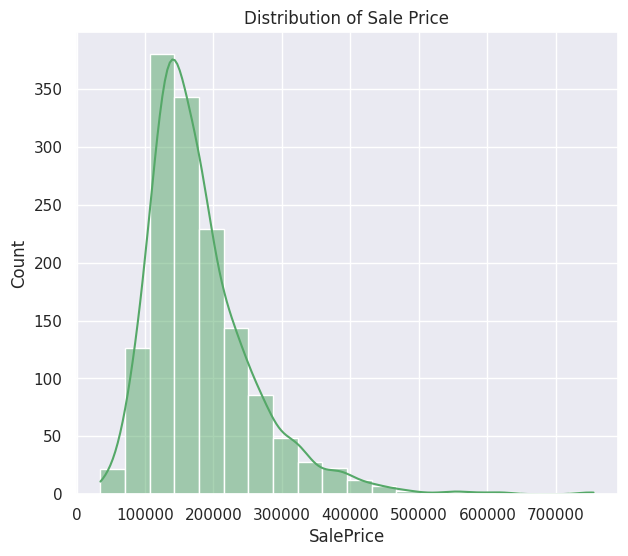

In [ ]:
print(df['SalePrice'].describe())
plt.figure(figsize=(7, 6))
sns.histplot(df['SalePrice'], bins=20, kde=True, color='g')
plt.title(f'Distribution of Sale Price')
plt.show()

### Review the numerical features
After removing the ID column and SalePrice, there are 36 numerical features remaining in the dataset.

In [ ]:
# select only the numerical features
df_num = df.select_dtypes(include = ['float64', 'int64'])

# drop Id and SalePrice columns
df_num = df_num.drop('Id', axis=1)
df_num = df_num.drop('SalePrice', axis=1)

# print shape of dataset
shape = df_num.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

# show first 5 rows of data frame
df_num.head()

Shape of the dataframe (row, col): (2919, 36) 



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008



Among the 36 numerical features, 33 columns have no missing data, indicating that these features are complete for all rows. However, there are 3 features that contain missing values. Among them, LotFrontage has the highest number of missing data points, with 259 instances. Nevertheless, it's worth noting that LotFrontage still has data available for over 80% of the houses in the dataset. Therefore, there is no immediate cause for concern, and there is no need to consider dropping any of these columns based on the amount of missing data.


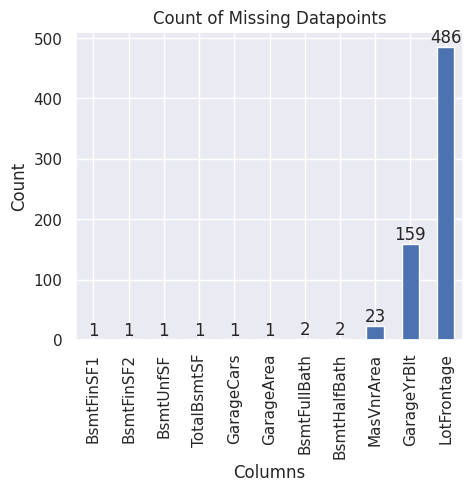

In [ ]:
# find and plot how many missing values each column has
missing = df_num.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize=(5, 4))
missing.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count of Missing Datapoints')

# Displaying the count of the bars above each bar
for i, v in enumerate(missing):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Among the 36 numerical features, 33 columns have no missing data, indicating that these features are complete for all rows. However, there are 11 features that contain missing values. Among them, LotFrontage has the highest number of missing data points, with 486 instances. LotFrontage represents the linear feet of street connected to property. It seems to be highly correlated with other features as well as shown in our correlation matrix below, so we will be removing it for our modeling.


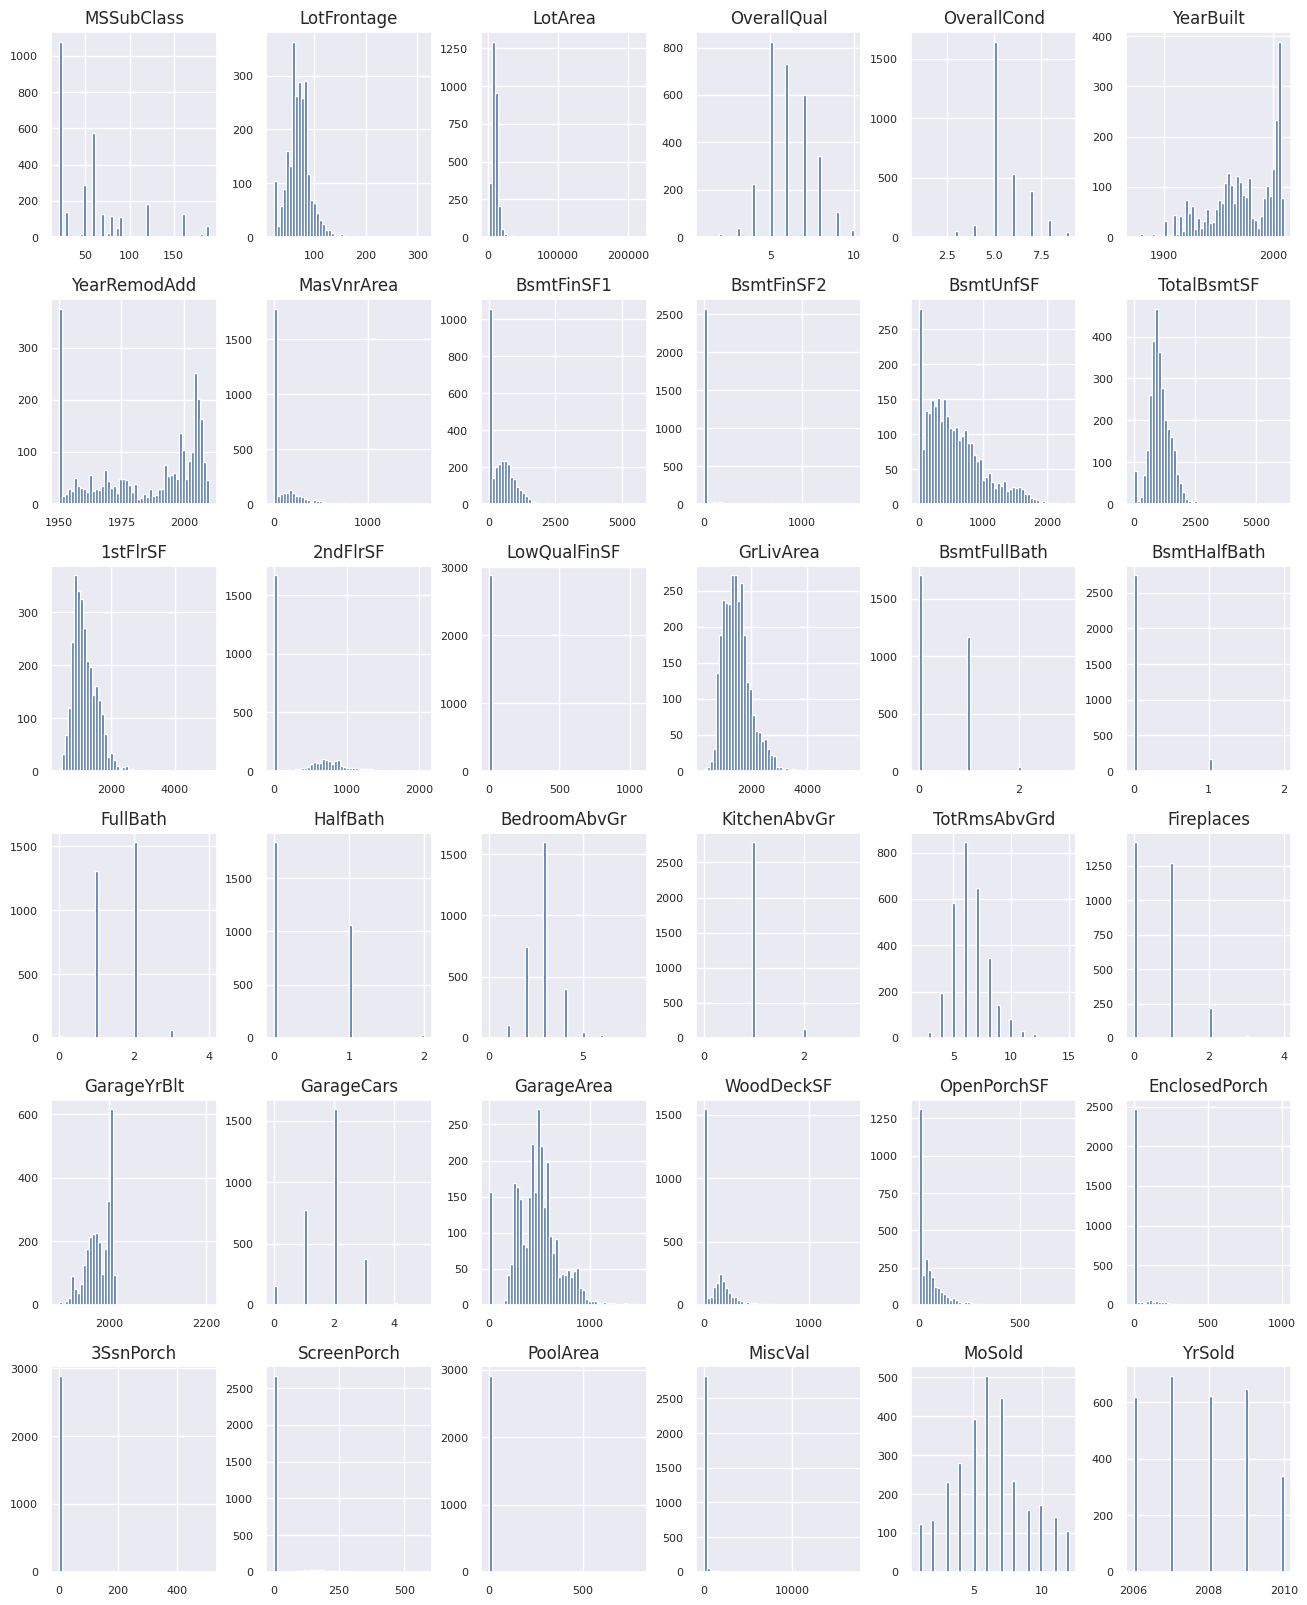

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
# Statistics on years
print("The earliest house was built in {}, and the most recent house was built in {}.".format(min(df_train['YearBuilt']), max(df_train['YearBuilt'])))
print("They started adding a garage in {} up until {}.".format(min(df_train['GarageYrBlt']), max(df_train['GarageYrBlt'])))
print("They also started remodeling in {} up until {}.".format(min(df_train['YearRemodAdd']), max(df_train['YearRemodAdd'])))
print("The houses were sold from {} up until {}.".format(min(df_train['YrSold']), max(df_train['YrSold'])))

The earliest house was built in 1872, and the most recent house was built in 2010.
They started adding a garage in 1900.0 up until 2010.0.
They also started remodeling in 1950 up until 2010.
The houses were sold from 2006 up until 2010.


There are a few columns that quantify the quality and condition of the house.

In [ ]:
print("The average overall quality of the house is {} and ranges from {} to {}.".format(round(df_train['OverallQual'].mean(),2), min(df_train['OverallQual']),
                                                                                        max(df_train['OverallQual'])))
print("Similarly, the average overall condition of the house is {} and ranges from {} to {}.".format(round(df_train['OverallCond'].mean(),2),
                                                                                                     min(df_train['OverallCond']),
                                                                                                     max(df_train['OverallCond'])))

The average overall quality of the house is 6.1 and ranges from 1 to 10.
Similarly, the average overall condition of the house is 5.58 and ranges from 1 to 9.


There are also a few columns that look at different square footage of the house. For example, one that looks at the square footage of the garage area and another that looks at the square footage of the lot. These square footage columns are skewed to the right with most houses having a lower square footage, and then, there being outliers with a higher area. Looking at the box plot for Lot Area, it is clear that there are a significant number of outliers for this column.

Text(0.5, 1.0, 'Size of garage in square feet')

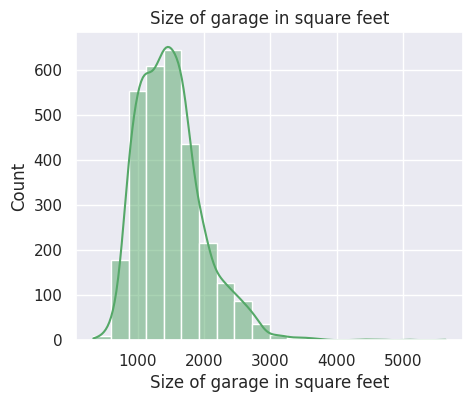

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(df['GrLivArea'], bins=20, kde=True, color='g')
plt.xlabel('Size of garage in square feet')
plt.ylabel('Count')
plt.title('Size of garage in square feet')

Text(0.5, 1.0, 'Size of lot in square feet')

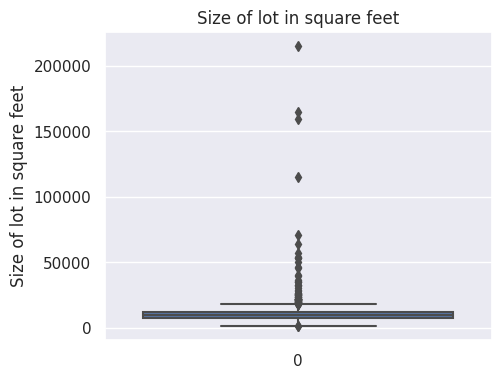

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(df_train['LotArea'])
plt.ylabel('Size of lot in square feet')
plt.title('Size of lot in square feet')

When looking at the correlation matrix, there are quite a few variables that have a high correlation with the Log of SalePrice. The highest correlation is 0.82 with `OverallQual`, which represents the overall material and finish quality. It makes sense that a higher finish quality would correlate with a higher Sale Price. The other features that have a correlation greater than 0.5 with the Log of SalePrice include YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GRLivArea, FullBath, TotRmsAbvGrd, GarageYrBlt, GarageCars, and GarageArea.

However, it does look like `OverallQual` is also highly correlated with many other predictor variables, this could lead to a problem known as multicollinearity. Since we are planning to use machine learning algorithms (like decision trees, random forests, gradient boosting), multicollinearity is less of an issue for these models. These algorithms can handle highly correlated features without much performance decrease. In fact, in some cases, including all the features might even help the model. Therefore, we will keep all the features for now.

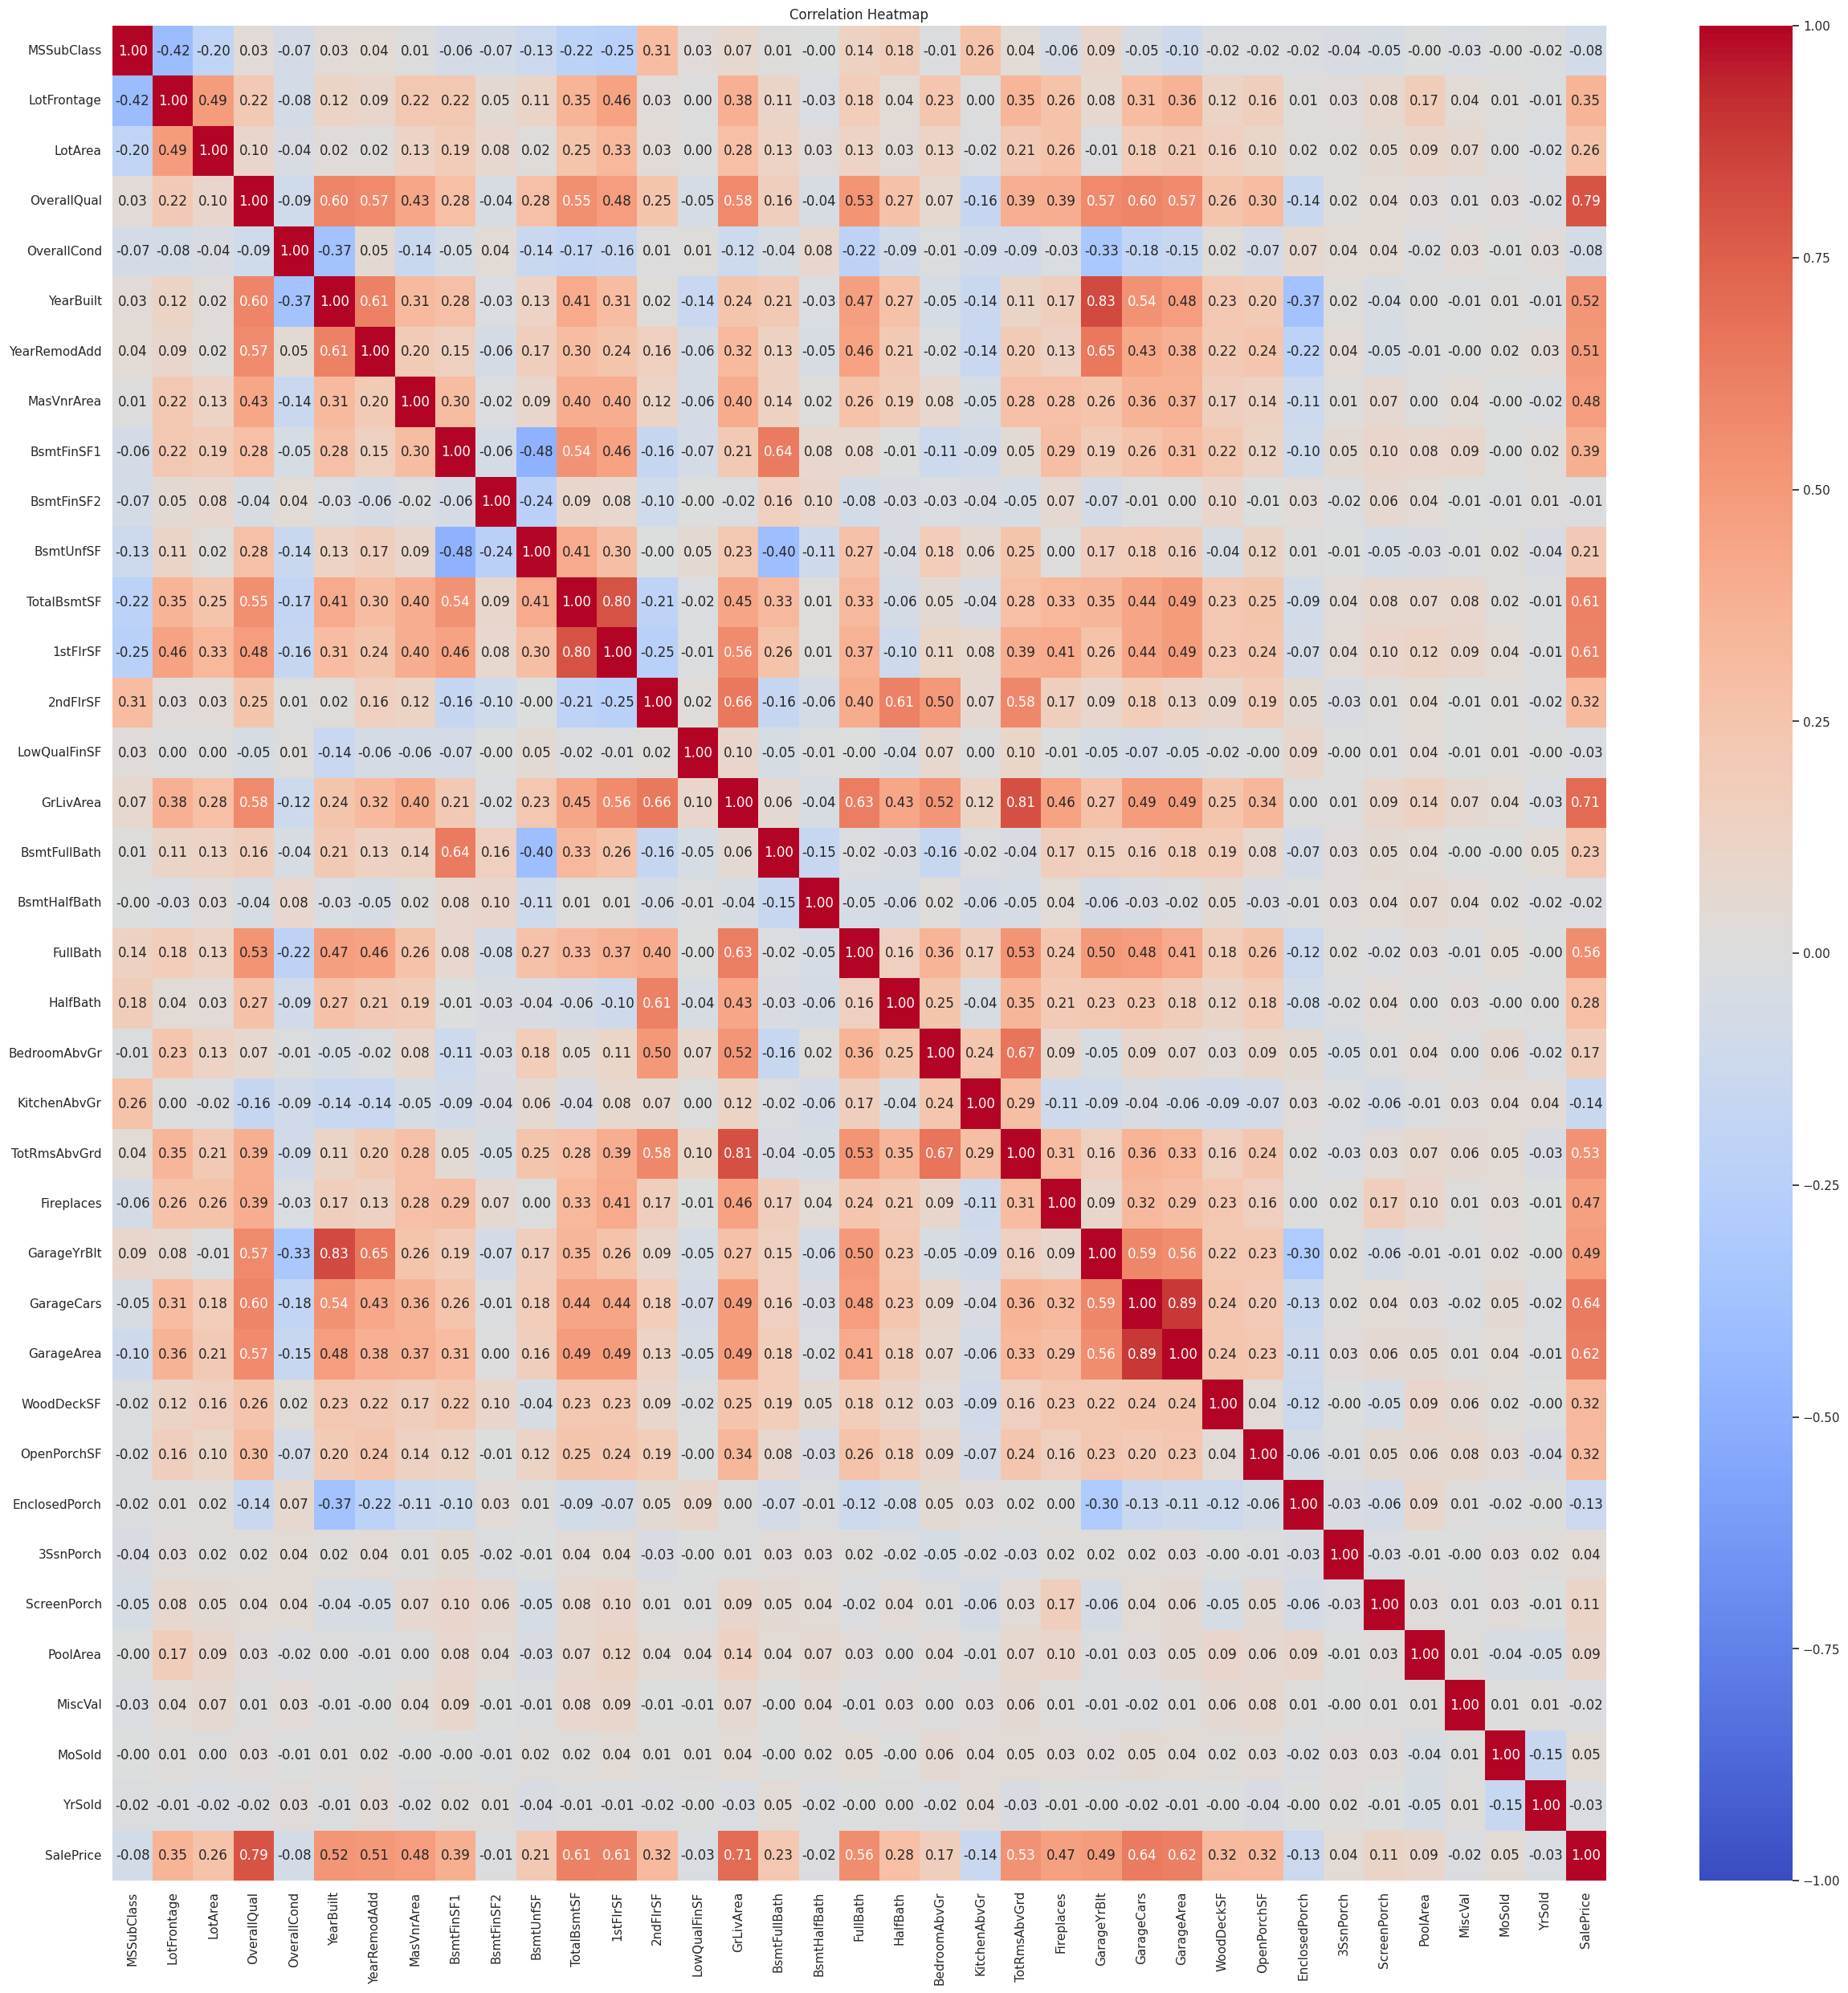

In [ ]:
# select only the numerical features
df_num_target = df.select_dtypes(include = ['float64', 'int64'])

# drop Id
df_num_target = df_num_target.drop('Id', axis=1)

# Correlation matrix
corr_matrix = df_num_target.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Review the categorical features
In the dataset, there are 43 categorical features.


In [ ]:
# select only the numerical features
df_cat = df.select_dtypes(include = ['object'])

# print shape of dataset
shape = df_cat.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

# show first 5 rows of data frame
df_cat.head()

Shape of the dataframe (row, col): (2919, 43) 



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


When we look at the missing values, we can see that there are 5 categorical fields that have a lot of missing values. `FireplaceQu` is the lowest in this category with 1420 missing values out of 2919. That represents roughly 49% of the data. Since there are so many missing values for these 5 features and since they don't seem crtical to understanding a house's value, we will be removing them from the dataset before conducting our modeling analysis.

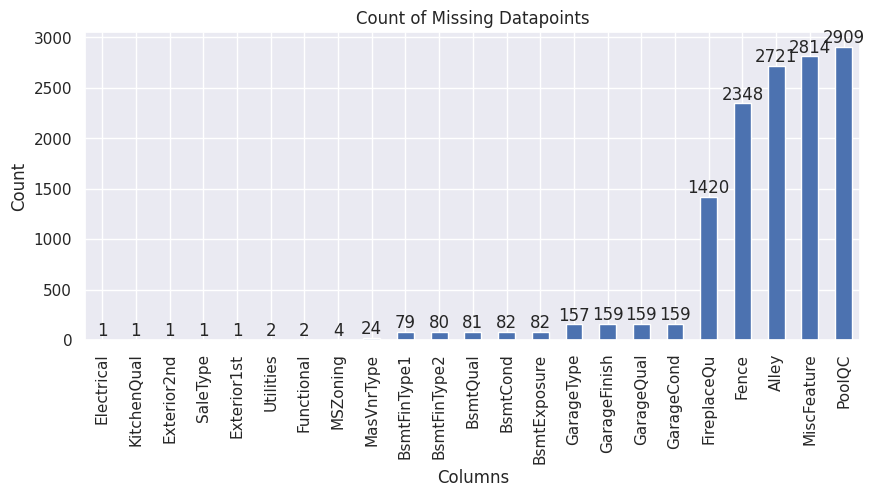

In [ ]:
# find and plot how many missing values each column has
missing = df_cat.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize=(10, 4))
missing.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Count of Missing Datapoints')

# Displaying the count of the bars above each bar
for i, v in enumerate(missing):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

During our data exploration, we noticed that there were a lot of ordinal (ordered) categorical features. For example, for Exterior Quality which represents the quality of the exterior material. There are 5 differenct cateogries: Ex	(Excellent), Gd	(Good), TA (Average/Typical), Fa (Fair), Po (Poor).  Since the order of these values provide valuable information, we will make sure to encode the order in the next section.

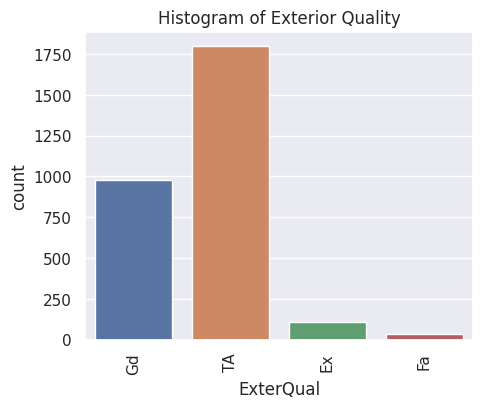

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='ExterQual')
plt.title(f'Histogram of Exterior Quality')
plt.xticks(rotation=90)
plt.show()

## Data preparation
Since lot LotFrontage has a high number of missing values and seems to be correlated with other features, it doesn't seem to provide enough information to be considered in our model. Thus, we have decided to remove it before preparing our model. We also decided to drop the categorical columns with more than 49% of missing values.

In [ ]:
# drop numerical feature with a lot of missing values
df = df.drop('LotFrontage', axis=1)

# drop categorical features with a lot of missing values
df = df.drop('FireplaceQu', axis=1)
df = df.drop('Fence', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('PoolQC', axis=1)

Column names beginning with numbers can be difficult to work with, so we will update these column names to make it easier.

In [ ]:
# update column names that start with numbers
df.rename(columns={
    "1stFlrSF": "FirstFlrSF",
    "2ndFlrSF": "SecondFlrSF",
    "3SsnPorch": "Threeseasonporch",
}, inplace=True,
)

In our data, there are both nominal and ordinal categories. After reviewing the data dictionary, we grouped each categorical variable into the appropriate category. The nominal features are converted to categorical type. The ordinal features are also converted to categorical type but with an order specified.

Note: The `MSSubClass` feature is read as an integer type, but it is actually a nominal categorical feature.

In [ ]:
# The nominal categorical features
features_nom = ["MSSubClass", "MSZoning", "Street", "LandContour",
                "LotConfig", "Neighborhood", "Condition1", "Condition2",
                "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st",
                "Exterior2nd", "MasVnrType", "Foundation", "Heating", "CentralAir",
                "GarageType", "SaleType", "SaleCondition"]


# The ordinal (ordered) categorical features
five_levels = ["Po", "Fa", "TA", "Gd", "Ex"]
ten_levels = list(range(10))
ordered_levels = {
    "OverallQual": ten_levels,
    "OverallCond": ten_levels,
    "ExterQual": five_levels,
    "ExterCond": five_levels,
    "BsmtQual": five_levels,
    "BsmtCond": five_levels,
    "HeatingQC": five_levels,
    "KitchenQual": five_levels,
    "GarageQual": five_levels,
    "GarageCond": five_levels,
    "LotShape": ["Reg", "IR1", "IR2", "IR3"],
    "LandSlope": ["Sev", "Mod", "Gtl"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "BsmtFinType1": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Functional": ["Sal", "Sev", "Maj1", "Maj2", "Mod", "Min2", "Min1", "Typ"],
    "GarageFinish": ["Unf", "RFn", "Fin"],
    "PavedDrive": ["N", "P", "Y"],
    "Utilities": ["NoSeWa", "NoSewr", "AllPub"],
    "CentralAir": ["N", "Y"],
    "Electrical": ["Mix", "FuseP", "FuseF", "FuseA", "SBrkr"]
}

# Nominal categories
for name in features_nom:
  df[name] = df[name].astype("category")

# Ordinal categories
for name, levels in ordered_levels.items():
  df[name] = df[name].astype(CategoricalDtype(levels, ordered=True))

## Feature engineering
Since 'SalePrice' has a lot of skewness, we will apply a logarithmic transformation to mitigate the impact of outliers. Since the data is right-skewed, there are a small number of exceptionally high values that pull the mean higher than the median and distort the distribution.

Such skewness can be problematic for many machine learning models, as they assume that the input variables have a normal or Gaussian distribution. Outliers or extreme values can significantly affect the model's performance by causing it to be overfitted to these exceptional cases, thereby generalizing poorly to new data.

A logarithmic transformation is a convenient means to reduce skewness. It works by reducing the impact of extreme values (outliers) and bringing them closer to the rest of the data, thereby making the data more normally distributed. This has the effect of spreading out the data that are clustered around lower values while compressing the data that are spread out at higher values. In other words, a log transformation tends to reduce the variability of data and make patterns more visible and easier to model.

So, by applying a log transformation to the 'SalePrice', we are making the data more amenable to analysis and modeling by standard machine learning techniques. This should improve the performance of our model and make its predictions more reliable.

By applying a logarithmic transformation, we can see that the variable is now normally distributed with outliers on both sides of the mean.

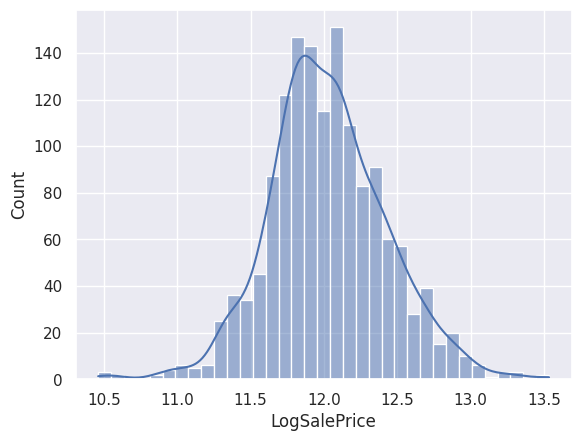

In [ ]:
# Apply log transformation
df['LogSalePrice'] = np.log(df['SalePrice'])

# Plot histogram to see the new distribution
sns.histplot(df['LogSalePrice'], kde=True)
plt.show()

Looking at the log(SalePrice), there are now only 28 outliers, which out of a total of 1460 observations represents approximately 1.9% of the data. Since this isn't a large proportion of the dataset and since we will likely use a machine learning model that is robust against outliers, such as tree-based methods (Random Forest, Gradient Boosting), we have decided to not remove these observations.

In [ ]:
# IQR method for outlier detection
Q1 = df['LogSalePrice'].quantile(0.25)
Q3 = df['LogSalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LogSalePrice'] < lower_bound) | (df['LogSalePrice'] > upper_bound)]

# Using len function
num_outliers = len(outliers)
print(f'The number of outliers is: {num_outliers}')

The number of outliers is: 28


For numerical data, an imputer fills in missing values (NaNs) with the median, so for each column of the data, it will replace the missing values with the median value of that column.

For the categorical data, the first step is another imputer that fills in missing values with the 'most_frequent' option, so for each column of data, it replaces missing values with the most frequent value (mode) in that column. The second step is a OneHotEncoder. This is used to convert categorical variables into a form that can be provided to machine learning algorithms to improve prediction. Machine learning algorithms cannot work with categorical data directly, and categories must be converted into numbers. This encoding helps to represent categorical data in a more expressive way that doesn't arbitrarily assign ranks to categories. The parameter handle_unknown='ignore' tells the encoder to ignore and not raise an error on an unknown category that might be present during the transform (fit) step but is not seen during the training step.

### Functions

In [ ]:
def one_hot_encode_categorical_columns(df):
    # Select only the categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Perform one-hot encoding
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

    return df_encoded

#### One-Hot Encode Categorical Columns

In [ ]:
df_encode = one_hot_encode_categorical_columns(df)

df_encode.shape
df_encode.dtypes.value_counts()

uint8      276
int64       23
float64     12
dtype: int64

In [ ]:
# Find columns with data type 'uint8'
uint8_columns = df_encode.select_dtypes(include=['uint8']).columns.tolist()

# Convert uint8 columns to object type
df_encode[uint8_columns] = df_encode[uint8_columns].astype(int)

In [ ]:
df_encode['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [ ]:
df_encode.dtypes.value_counts()

int64      299
float64     12
dtype: int64

#### Impute Missing Data

In [ ]:
# Determine numerical and categorical columns
numerical_columns = df_encode.select_dtypes(include=[float, int]).columns.tolist()
categorical_columns = df_encode.select_dtypes(include=[object, bool]).columns.tolist()

# Impute missing values for numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
df_numerical_imputed = pd.DataFrame(numerical_imputer.fit_transform(df_encode[numerical_columns]), columns=numerical_columns)

# Impute missing values for categorical columns with most frequent
#categorical_imputer = SimpleImputer(strategy='most_frequent')
#df_categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(df_encode[categorical_columns]), columns=categorical_columns)

# Concatenate the imputed numerical and categorical columns
#df_imputed = pd.concat([df_numerical_imputed, df_categorical_imputed], axis=1)
df_imputed = pd.concat([df_numerical_imputed], axis=1)

In [ ]:
df_imputed.shape

(2919, 311)

## Feature Engineering

### Train / Validation/ Test Split

In [ ]:
# Define your features and target variable
features = df_imputed.drop(['Id','SalePrice','LogSalePrice'], axis=1)  # Assuming 'target_variable' is the name of your target column
#features_train
target = df_imputed['LogSalePrice']
#target = df_imputed['SalePrice']

In [ ]:
# Define the row index to split at
split_row = 1460  # Adjust this value to your desired split point

# Split the data into train and test subsets
features_train = features[:split_row]
target_train = target[:split_row]

features_test = features[split_row:]
target_test = target[split_row:]

# Print the shape of each subset
print("Training subset:")
print("Features shape:", features_train.shape)
print("Target shape:", target_train.shape)
print()

print("Testing subset:")
print("Features shape:", features_test.shape)
print("Target shape:", target_test.shape," +Target Values Here are N/A and should be dropped later")

Training subset:
Features shape: (1460, 308)
Target shape: (1460,)

Testing subset:
Features shape: (1459, 308)
Target shape: (1459,)  +Target Values Here are N/A and should be dropped later


In [ ]:
# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(features_train, target_train, test_size=0.2, random_state=42)
#X_test, y_test = features_test, target_test

#### Exporting to Train/Validation split to CSV

In [ ]:
# Grab the feature names
feature_names = features.columns
feature_names

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=308)

In [ ]:
# Create DataFrames from the train and test data
"""train_data = pd.DataFrame(X_train, columns=feature_names)
train_data['target'] = y_train
test_val = pd.DataFrame(X_val, columns=feature_names)
test_val['target'] = y_val"""


"train_data = pd.DataFrame(X_train, columns=feature_names)\ntrain_data['target'] = y_train\ntest_val = pd.DataFrame(X_val, columns=feature_names)\ntest_val['target'] = y_val"

In [ ]:
#train_data.head()
#test_val.head()

In [ ]:
"""# Export train and test data to CSV
train_data.to_csv('train_data.csv', index=False)
test_val.to_csv('test_val.csv', index=False)

# Specify the folder ID where you want to upload the files
folder_id = '1O1czzZ6nnZZCxul4Zwk46MqsoD7AmB4c'

# Upload train data to Google Drive
train_file = drive.CreateFile({'title': 'train_data.csv', 'parents': [{'id': folder_id}]})
train_file.SetContentFile('train_data.csv')
train_file.Upload()

# Upload test data to Google Drive
test_file = drive.CreateFile({'title': 'test_val.csv','parents': [{'id': folder_id}]})
test_file.SetContentFile('test_val.csv')
test_file.Upload()"""

## Feature Selection
How were the features selected based on the data analysis?
- Do a correlation technique or feature importance to select the most important features

### Create a feature Importance Dataframe

We will append feature importance scores for each model here

In [ ]:
feature_importance_df = pd.DataFrame({'Features':feature_names})
feature_importance_df

,Features
0,LotArea
1,YearBuilt
2,YearRemodAdd
3,MasVnrArea
4,BsmtFinSF1
...,...
303,SaleCondition_AdjLand
304,SaleCondition_Alloca
305,SaleCondition_Family
306,SaleCondition_Normal


## Models

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Score'])

In [ ]:
results_df

,Model,Score


### Decision Tree Model ~ 0.20434

RMSE: 0.20406874332607497


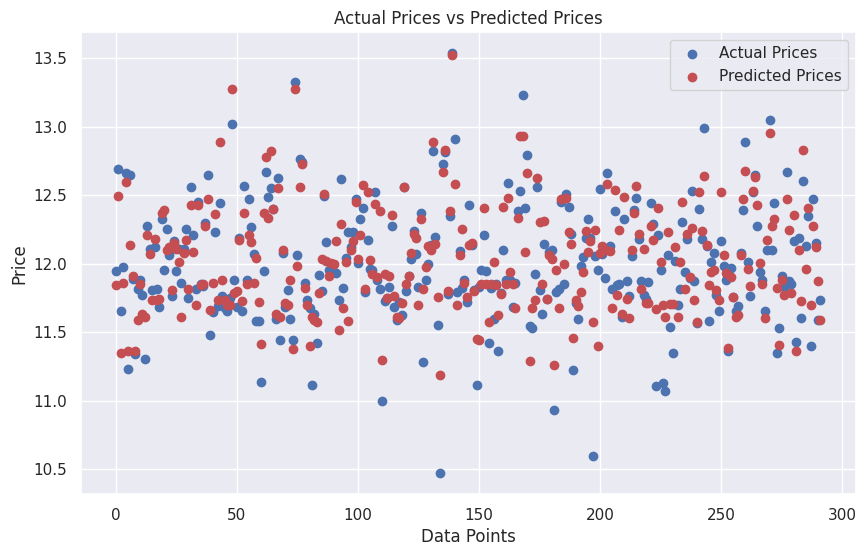

In [ ]:
#Building the Decision Tree
model_name = 'Decision Tree'
clf = tree.DecisionTreeRegressor() # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_val)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Score': rmse}, ignore_index=True)

# Print RMSE
print("RMSE:", rmse)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
X_val.shape

(292, 309)

In [ ]:
clf.feature_importances_.shape

(308,)

#### Get Decision Tree Feature Importance Top 25

In [ ]:
clf_importances = clf.feature_importances_
feature_importance_df['Decision Tree'] = clf_importances
feature_importance_df

,Features,Decision Tree
0,LotArea,0.016308
1,YearBuilt,0.012769
2,YearRemodAdd,0.002320
3,MasVnrArea,0.002694
4,BsmtFinSF1,0.015260
...,...,...
303,SaleCondition_AdjLand,0.000000
304,SaleCondition_Alloca,0.000000
305,SaleCondition_Family,0.000000
306,SaleCondition_Normal,0.000260


#### Evaluation
Performance measures, results, and conclusions

### Ensemble Method

####  Setup cross validation and define error metrics

In [ ]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [ ]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression',
                       num_leaves=6,
                       learning_rate=0.01,
                       n_estimators=7000,
                       max_bin=200,
                       bagging_fraction=0.8,
                       bagging_freq=4,
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42,
                       enable_categorical = False)


# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
#ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))
ridge = Pipeline([('scaler', RobustScaler()), ('ridgecv', RidgeCV(alphas=ridge_alphas, cv=kf))])
# Support Vector Regressor
#svr = Pipeline([('scaler',RobustScaler()),('svr',SVR(kernel='linear',C= 20, epsilon= 0.008, gamma=0.0003))])

#svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm,ridge, gbr, rf), #took  svr out
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

#### LightGBM

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
RMSE: 0.14210944818011614


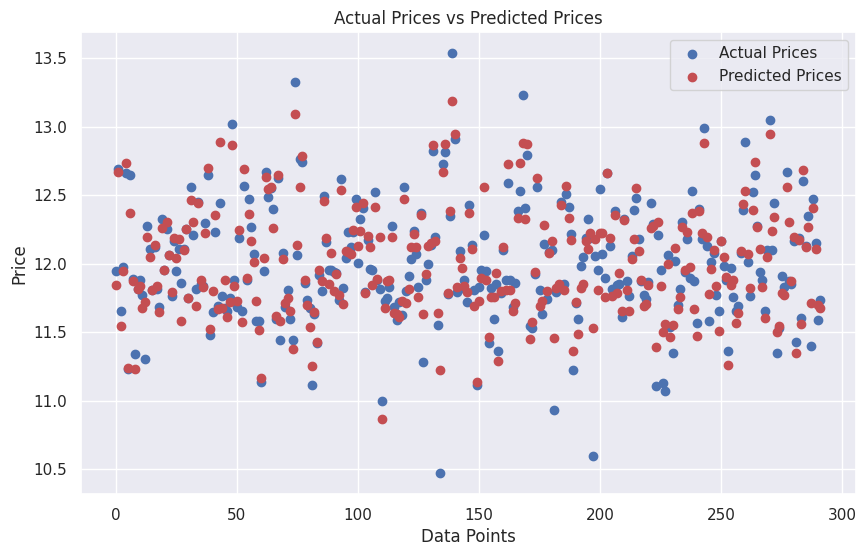

In [ ]:
model_name = 'LightGBM'

# Fit the model on the training data
lightgbm.fit(X_train, y_train)


# Make predictions on the test data
y_pred = lightgbm.predict(X_val)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", rmse)

# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Score': rmse}, ignore_index=True)


# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
lgbm_importances = lightgbm.feature_importances_
feature_importance_df['Light GBM'] = lgbm_importances
feature_importance_df

,Features,Decision Tree,Light GBM
0,LotArea,0.016308,1838
1,YearBuilt,0.012769,1147
2,YearRemodAdd,0.002320,1048
3,MasVnrArea,0.002694,848
4,BsmtFinSF1,0.015260,1200
...,...,...,...
303,SaleCondition_AdjLand,0.000000,0
304,SaleCondition_Alloca,0.000000,0
305,SaleCondition_Family,0.000000,0
306,SaleCondition_Normal,0.000260,200


#### XGBoost Regressor

RMSE: 0.16125408869451768


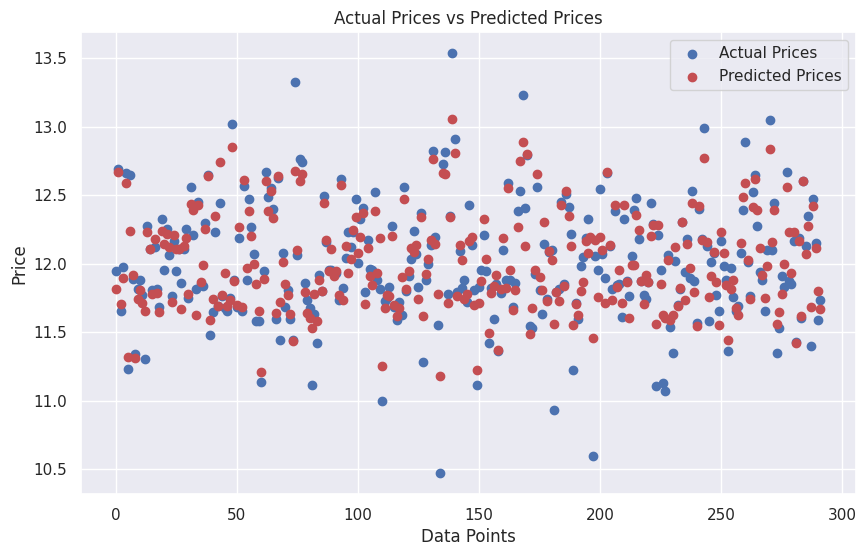

In [ ]:
model_name = 'XGBoost'
# Fit the model on the training data
xgboost.fit(X_train, y_train)


# Make predictions on the test data
y_pred = xgboost.predict(X_val)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
print("RMSE:", rmse)

# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Score': rmse}, ignore_index=True)

# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
xgboost_importances = xgboost.feature_importances_
feature_importance_df['Xgboost'] = xgboost_importances
feature_importance_df

,Features,Decision Tree,Light GBM,Xgboost
0,LotArea,0.016308,1838,0.011895
1,YearBuilt,0.012769,1147,0.060159
2,YearRemodAdd,0.002320,1048,0.023166
3,MasVnrArea,0.002694,848,0.007317
4,BsmtFinSF1,0.015260,1200,0.011209
...,...,...,...,...
303,SaleCondition_AdjLand,0.000000,0,0.000000
304,SaleCondition_Alloca,0.000000,0,0.000000
305,SaleCondition_Family,0.000000,0,0.000000
306,SaleCondition_Normal,0.000260,200,0.000000


#### Ridge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49267e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.6036e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.66514e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.20368e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

RMSE: 0.13832926149527158


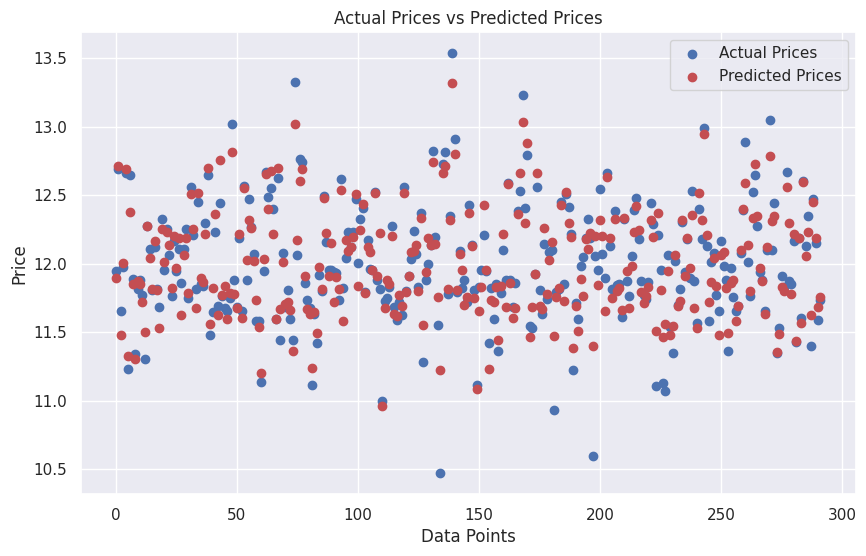

In [ ]:
model_name = 'ridge'
# Fit the model on the training data
ridge.fit(X_train, y_train)


# Make predictions on the test data
y_pred = ridge.predict(X_val)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Score': rmse}, ignore_index=True)


# Print RMSE
print("RMSE:", rmse)

# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
#ridge

In [ ]:
# Access the Ridge model within the pipeline
ridge_model = ridge['ridgecv']

# Get the feature importances from the Ridge, in this case Coefficients
importances = ridge_model.coef_

ridge_importances = importances
feature_importance_df['Ridge'] = ridge_importances
feature_importance_df

,Features,Decision Tree,Light GBM,Xgboost,Ridge
0,LotArea,0.016308,1838,0.011895,0.004847
1,YearBuilt,0.012769,1147,0.060159,0.054097
2,YearRemodAdd,0.002320,1048,0.023166,0.044045
3,MasVnrArea,0.002694,848,0.007317,0.001068
4,BsmtFinSF1,0.015260,1200,0.011209,-0.002416
...,...,...,...,...,...
303,SaleCondition_AdjLand,0.000000,0,0.000000,0.006949
304,SaleCondition_Alloca,0.000000,0,0.000000,0.050317
305,SaleCondition_Family,0.000000,0,0.000000,-0.016156
306,SaleCondition_Normal,0.000260,200,0.000000,0.004625


#### Support Vector Regression

In [ ]:
# Fit the model on the training data
#svr.fit(X_train, y_train)


# Make predictions on the test data
#y_pred = svr.predict(X_val)


# Calculate RMSE
#rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Print RMSE
#print("RMSE:", rmse)

# Plot the predictions versus the actual prices
#plt.figure(figsize=(10, 6))
#plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
#plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
#plt.xlabel('Data Points')
#plt.ylabel('Price')
#plt.title('Actual Prices vs Predicted Prices')
#plt.legend()
#plt.show()

In [ ]:
# Access the Random Forest model within the pipeline
#svr_model = svr['svr']

# Get the feature importances from the Random Forest model
#importances = svr_model.coef_

#svr_importances = importances
#feature_importance_df['Support Vector Regression'] = svr_importances
#feature_importance_df


#### Random Forest

RMSE: 0.15873135477142106


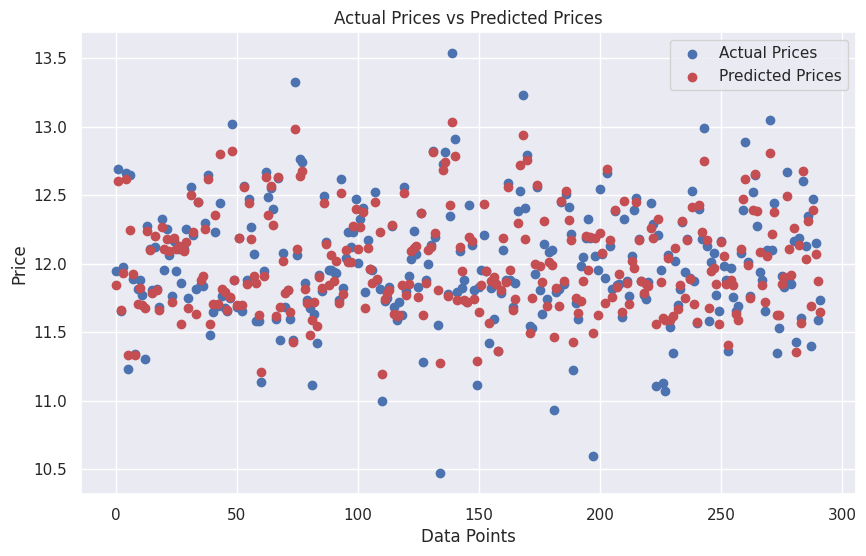

In [ ]:
model_name = 'Random Forest'
# Fit the model on the training data
rf.fit(X_train, y_train)


# Make predictions on the test data
y_pred = rf.predict(X_val)



# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Score': rmse}, ignore_index=True)

# Print RMSE
print("RMSE:", rmse)

# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# Access the Ridge model within the pipeline
ridge_model = ridge['ridgecv']

# Get the feature importances from the Ridge, in this case Coefficients
importances = ridge_model.coef_

ridge_importances = importances
feature_importance_df['Ridge'] = ridge_importances
feature_importance_df

,Features,Decision Tree,Light GBM,Xgboost,Ridge
0,LotArea,0.016308,1838,0.011895,0.004847
1,YearBuilt,0.012769,1147,0.060159,0.054097
2,YearRemodAdd,0.002320,1048,0.023166,0.044045
3,MasVnrArea,0.002694,848,0.007317,0.001068
4,BsmtFinSF1,0.015260,1200,0.011209,-0.002416
...,...,...,...,...,...
303,SaleCondition_AdjLand,0.000000,0,0.000000,0.006949
304,SaleCondition_Alloca,0.000000,0,0.000000,0.050317
305,SaleCondition_Family,0.000000,0,0.000000,-0.016156
306,SaleCondition_Normal,0.000260,200,0.000000,0.004625


#### Gradient Boost

RMSE: 0.13339837700219723


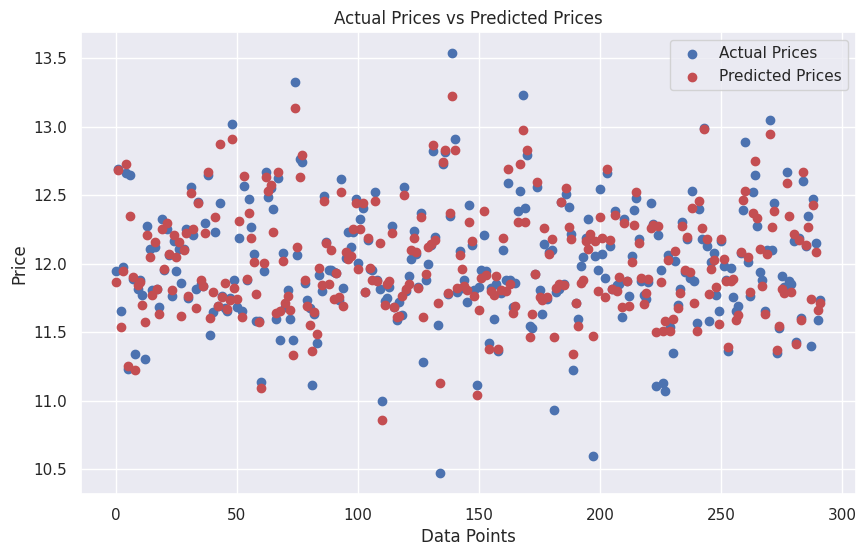

In [ ]:
model_name = 'Gradient Boost'
# Fit the model on the training data
gbr.fit(X_train, y_train)


# Make predictions on the test data
y_pred = gbr.predict(X_val)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Score': rmse}, ignore_index=True)

# Print RMSE
print("RMSE:", rmse)

# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [ ]:
gradboost_importances = gbr.feature_importances_
feature_importance_df['Gradient Boost'] = gradboost_importances
feature_importance_df

,Features,Decision Tree,Light GBM,Xgboost,Ridge,Gradient Boost
0,LotArea,0.016308,1838,0.011895,0.004847,0.024140
1,YearBuilt,0.012769,1147,0.060159,0.054097,0.042921
2,YearRemodAdd,0.002320,1048,0.023166,0.044045,0.026136
3,MasVnrArea,0.002694,848,0.007317,0.001068,0.008169
4,BsmtFinSF1,0.015260,1200,0.011209,-0.002416,0.020658
...,...,...,...,...,...,...
303,SaleCondition_AdjLand,0.000000,0,0.000000,0.006949,0.000000
304,SaleCondition_Alloca,0.000000,0,0.000000,0.050317,0.000000
305,SaleCondition_Family,0.000000,0,0.000000,-0.016156,0.000024
306,SaleCondition_Normal,0.000260,200,0.000000,0.004625,0.000128


#### Stacked Model

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61233e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.61216e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.63053e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.63889e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49267e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.6036e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.66514e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.20368e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

RMSE: 0.14276223711520977


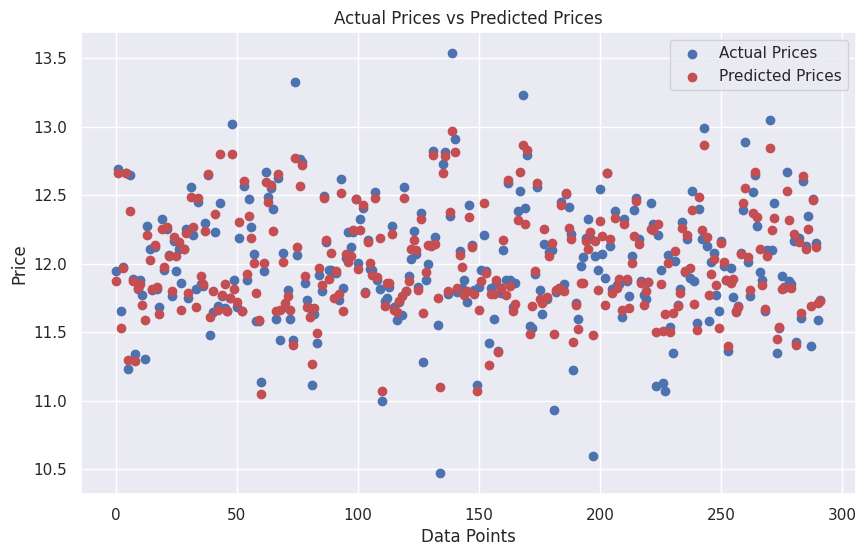

In [ ]:
model_name = 'Stacked Model'
# Fit the model on the training data
stack_gen.fit(np.array(X_train), np.array(y_train))


# Make predictions on the test data
y_pred = stack_gen.predict(X_val)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# Append the model name and score to the results DataFrame
results_df = results_df.append({'Model': model_name, 'Score': rmse}, ignore_index=True)

# Print RMSE
print("RMSE:", rmse)

# Plot the predictions versus the actual prices
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_val)), y_val, color='b', label='Actual Prices')
plt.scatter(range(len(y_pred)), y_pred, color='r', label='Predicted Prices')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

## Results For All Models

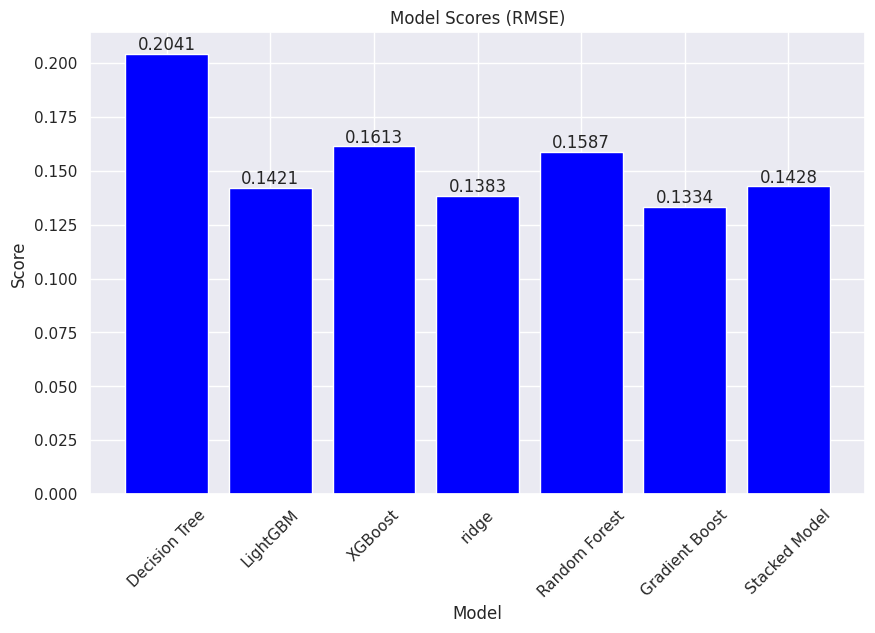

In [ ]:
# Create the bar chart
plt.figure(figsize=(10, 6))
bars =plt.bar(results_df['Model'], results_df['Score'], color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores (RMSE)')
plt.xticks(rotation=45)

# Display the score values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')


# Display the chart
plt.show()

## Feature Importance Analysis

In [ ]:
# get columns of scores only
columns_to_standardize = feature_importance_df.columns[1:]

# Create a StandardScaler object
scaler = MinMaxScaler()

# Standardize the selected columns
features_imp_scaled = feature_importance_df.copy()
features_imp_scaled[columns_to_standardize] = scaler.fit_transform(features_imp_scaled[columns_to_standardize])

In [ ]:
features_imp_scaled

,Features,Decision Tree,Light GBM,Xgboost,Ridge,Gradient Boost
0,LotArea,0.039251,1.000000,0.163143,0.535413,0.328647
1,YearBuilt,0.030734,0.624048,0.825100,0.756936,0.584341
2,YearRemodAdd,0.005584,0.570185,0.317737,0.711720,0.355824
3,MasVnrArea,0.006485,0.461371,0.100353,0.518415,0.111215
4,BsmtFinSF1,0.036730,0.652884,0.153732,0.502745,0.281242
...,...,...,...,...,...,...
303,SaleCondition_AdjLand,0.000000,0.000000,0.000000,0.544869,0.000000
304,SaleCondition_Alloca,0.000000,0.000000,0.000000,0.739933,0.000000
305,SaleCondition_Family,0.000000,0.000000,0.000000,0.440942,0.000332
306,SaleCondition_Normal,0.000627,0.108814,0.000000,0.534414,0.001737


### Create a new feature for sum of all scaled importances

In [ ]:
features_imp_scaled['Score'] = features_imp_scaled[columns_to_standardize].sum(axis=1)
features_imp_scaled

,Features,Decision Tree,Light GBM,Xgboost,Ridge,Gradient Boost,Score
0,LotArea,0.039251,1.000000,0.163143,0.535413,0.328647,2.066454
1,YearBuilt,0.030734,0.624048,0.825100,0.756936,0.584341,2.821159
2,YearRemodAdd,0.005584,0.570185,0.317737,0.711720,0.355824,1.961049
3,MasVnrArea,0.006485,0.461371,0.100353,0.518415,0.111215,1.197839
4,BsmtFinSF1,0.036730,0.652884,0.153732,0.502745,0.281242,1.627332
...,...,...,...,...,...,...,...
303,SaleCondition_AdjLand,0.000000,0.000000,0.000000,0.544869,0.000000,0.544869
304,SaleCondition_Alloca,0.000000,0.000000,0.000000,0.739933,0.000000,0.739933
305,SaleCondition_Family,0.000000,0.000000,0.000000,0.440942,0.000332,0.441274
306,SaleCondition_Normal,0.000627,0.108814,0.000000,0.534414,0.001737,0.645592


In [ ]:
# Assuming `df` is your DataFrame
features_imp_scaled_sorted = features_imp_scaled.sort_values(by='Score', ascending=False).reset_index(drop=True)
features_imp_scaled_sorted[:50]

,Features,Decision Tree,Light GBM,Xgboost,Ridge,Gradient Boost,Score
0,GrLivArea,1.000000e+00,0.920566,0.423762,0.911358,1.000000,4.255685
1,TotalBsmtSF,2.212546e-01,0.997824,0.655550,0.533454,0.796816,3.204899
2,YearBuilt,3.073358e-02,0.624048,0.825100,0.756936,0.584341,2.821159
3,GarageArea,4.412260e-02,0.918390,0.425871,0.551178,0.703924,2.643485
4,ExterQual_TA,3.132220e-01,0.061480,1.000000,0.460275,0.579358,2.414335
5,FirstFlrSF,3.395500e-02,0.933079,0.182246,0.658646,0.589955,2.397881
6,GarageCars,1.722230e-01,0.257889,0.592452,0.775131,0.592762,2.390456
7,LotArea,3.925085e-02,1.000000,0.163143,0.535413,0.328647,2.066454
8,GarageYrBlt,5.264551e-02,0.511425,0.282354,0.472905,0.738004,2.057333
9,Fireplaces,3.791299e-03,0.217084,0.695130,0.676395,0.415642,2.008042


## Discussion and conclusions
Address the problem statement and recommendation